In [1]:
# paper 4
# Rahul Panwar 20bcs171
# Adarsh kumar 20bcs016
# mam here we have used the newsheadline dataset along with newsheadline dataset which consists of lots of sarcastic and non - sarcastic text

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nltk
#nltk.download()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the file
data =  pd.read_json('/content/drive/MyDrive/Sarcasm_Headlines_Dataset_v2.json', lines=True)
data.rename(columns={'headline': 'text'}, inplace=True)

In [5]:
# view the data
data.head(100)

,is_sarcastic,text,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
95,0,number of homeless students in america is risi...,https://www.huffingtonpost.com/entry/homeless-...
96,1,report: majority of instances of people gettin...,https://www.theonion.com/report-majority-of-in...
97,1,groundbreaking study finds gratification can b...,https://www.theonion.com/groundbreaking-study-...
98,0,nick cannon responds to mariah carey's engagem...,https://www.huffingtonpost.com/entry/nick-cann...


In [6]:
# shape of the data
data.shape

(28619, 3)

In [13]:
data_len = data['text'].apply(lambda x: len(x.split(' '))).sum()
print(f'We have {data_len} words in the headline')

We have 287674 words in the headline


In [8]:
# check the columns names
data.columns

Index(['is_sarcastic', 'text', 'article_link'], dtype='object')

In [9]:
# check the data types in the columns
data.dtypes

is_sarcastic     int64
text            object
article_link    object
dtype: object

In [10]:
#checking the unique values in 'is_sarcastic' column
data.is_sarcastic.unique()

array([1, 0])

In [11]:
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)

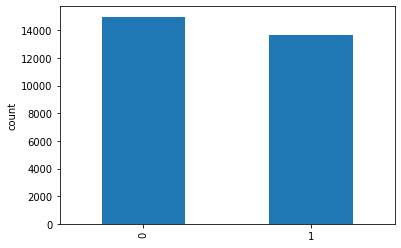

In [16]:
#checking the value counts in 'is_sarcastic' column
data.is_sarcastic.value_counts()
sns.countplot(data['is_sarcastic'].value_counts())
data['is_sarcastic'].value_counts().plot(kind='bar')
plt.show()

In [17]:
# check the null values in data
data.isna().sum() 

is_sarcastic    0
text            0
article_link    0
dtype: int64

In [18]:
#drop 'article_link' column
data = data.drop('article_link', axis=1)

In [20]:
#ckeck the data
data.head(100)

,is_sarcastic,text
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
...,...,...
95,0,number of homeless students in america is risi...
96,1,report: majority of instances of people gettin...
97,1,groundbreaking study finds gratification can b...
98,0,nick cannon responds to mariah carey's engagem...


In [21]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
#import necessary library
import re
from nltk.corpus import stopwords

set_stopwords = set(stopwords.words("english"))


def clean_txt(text): 
                        
    text = re.sub(r"[^A-Za-z,!?]", " ", text)     
    text = ' '.join(word for word in text.split() if word not in set_stopwords)
    return text

data['text'] = data['text'].apply(clean_txt)

In [23]:
data_clean_len = data['text'].apply(lambda x: len(x.split(' '))).sum() 
print(f'After text cleaning we have only {data_clean_len} words to work with')

After text cleaning we have only 205988 words to work with


*Most common words*

In [25]:
#create DataFrame for sarcastic words 
sarcastic = pd.DataFrame(data[data['is_sarcastic']==1]['text'].str.split(expand=True).unstack().value_counts()).reset_index()

In [26]:
#create DataFrame for non_sarcastic words 
non_sarcastic = pd.DataFrame(data[data['is_sarcastic']==0]['text'].str.split(expand=True).unstack().value_counts()).reset_index()

WordCloud Vizualization with StopWords**

In [29]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

sarcasctic_2 = [every_word.lower() for every_word in sarcastic['index']]

sarc_nonstop = [word for word in sarcasctic_2 if word not in stopwords]

non_sarcasctic_2 = [every_word.lower() for every_word in non_sarcastic['index']]

non_sarc_nonstop = [word for word in non_sarcasctic_2 if word not in stopwords]


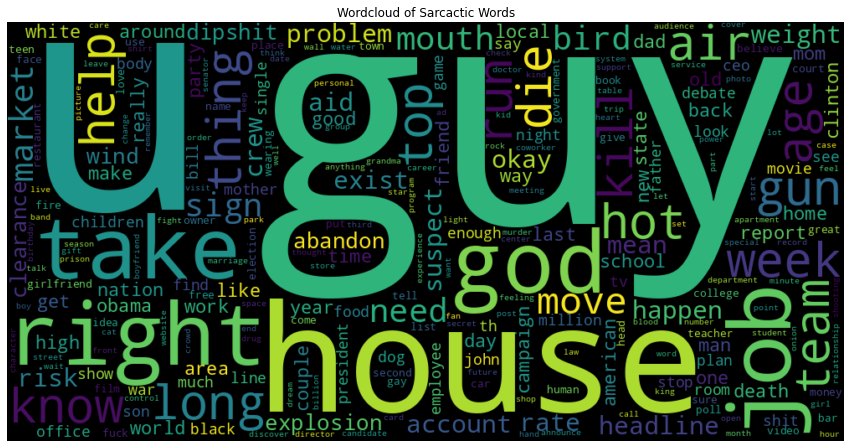

In [30]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1000, height=500,
                      max_words=300, min_font_size = 10,
                      background_color="black",
                      stopwords = stopwords, 
                      ).generate(' ' .join(word for word in sarc_nonstop))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud of Sarcactic Words', color="black")
plt.axis("off")
plt.show()

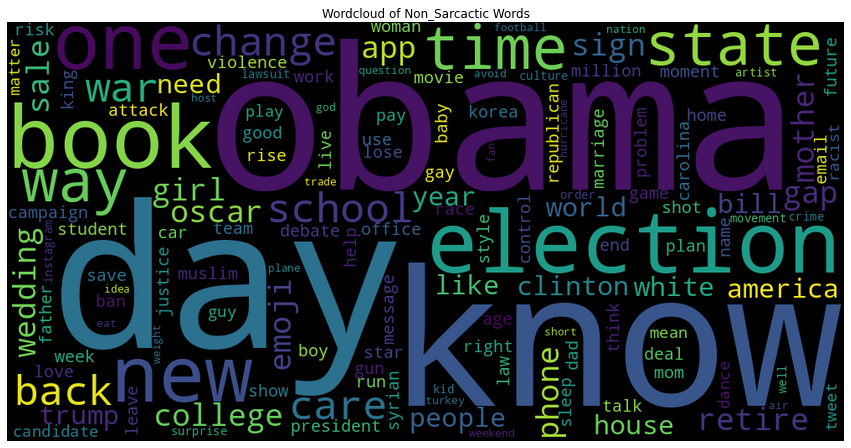

In [31]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1000, height=500,
                      max_words=300, min_font_size = 10,
                      background_color="black",
                      stopwords = stopwords,
                      ).generate(' ' .join(word for word in non_sarc_nonstop))

plt.imshow(wordcloud, interpolation='spline36')
plt.title('Wordcloud of Non_Sarcactic Words', color="black")
plt.axis("off")
plt.show()

Mam here we are doing Text pre-processing

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(data['text']).toarray()
y = data.iloc[:, -1].values
cv.get_feature_names_out()
data = pd.DataFrame(X_cv, columns=cv.get_feature_names_out())
data


,ab,abandon,abandoned,abandoning,abandons,abayas,abbas,abbey,abbi,abby,...,zookeeper,zoolander,zoologist,zoologists,zoomed,zoroastrianism,zsa,ztari,zucker,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.model_selection import train_test_split 
X = text
y = data['label'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)


**Multinomial Naive Bayes Classifier**

In [36]:

from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import f1_score, accuracy_score, classification_report

# Add noise to the training data
import random
X_train_noisy = ["".join(random.sample(x, len(x))) for x in X_train]

pipe1 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1, ngram_range=(1,1))), 
                   ('MNB', MultinomialNB(alpha=0.01, fit_prior=True)),])

parameters1 = {'MNB__alpha': [0.01,0.02,0.03,0.04,0.05],
                'MNB__fit_prior': [True]}
gridMNB = GridSearchCV(pipe1, parameters1 ,cv=7,n_jobs=-1, verbose=3)
gridMNB.fit(X_train_noisy, y_train)

%time y_pred1 = gridMNB.predict(X_test)

#getting the best accuracy and parameters
print('MNB_Train Accuracy : %.3f'%gridMNB.best_estimator_.score(X_train_noisy, y_train))
print('MNB_Test Accuracy : %.3f'%gridMNB.best_estimator_.score(X_test, y_test))
print('MNB_Best Accuracy Through Grid Search : %.3f'%gridMNB.best_score_)
print('MNB_Best Parameters : ',gridMNB.best_params_)
print(15*'--->--->')
print('classification_report: \n', classification_report(y_test, y_pred1))

Fitting 7 folds for each of 5 candidates, totalling 35 fits
CPU times: user 25.7 ms, sys: 0 ns, total: 25.7 ms
Wall time: 25.5 ms
MNB_Train Accuracy : 1.000
MNB_Test Accuracy : 1.000
MNB_Best Accuracy Through Grid Search : 1.000
MNB_Best Parameters :  {'MNB__alpha': 0.03, 'MNB__fit_prior': True}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2862

    accuracy                           1.00      2862
   macro avg       1.00      1.00      1.00      2862
weighted avg       1.00      1.00      1.00      2862



**Stochastic Gradient Descent Classifier**

In [37]:
from sklearn.linear_model import SGDClassifier

pipe2 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1)),
                  ('tfidf', TfidfTransformer()),
                  ('SGD', SGDClassifier(loss='modified_huber', penalty='l2',alpha=0.0001,shuffle=True,
                                      learning_rate='optimal',random_state=None, max_iter=100,)),
                   ])
parameters2 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'SGD__alpha': [0.0001,0.01,1,10],
                'SGD__max_iter': [1,10,100,1000],
                  'SGD__loss': ['modified_huber'],
                  'SGD__penalty': ['l2']}

              
gridSGD = GridSearchCV(pipe2, parameters2 ,cv=8, n_jobs=-1, verbose=3)
gridSGD.fit(X_train, y_train)

%time y_pred2 = gridSGD.predict(X_test)

print('SGD_Train Accuracy : %.3f'%gridSGD.best_estimator_.score(X_train, y_train))
print('SGD_Test Accuracy : %.3f'%gridSGD.best_estimator_.score(X_test, y_test))
print('SGD_Best Accuracy Through Grid Search : %.3f'%gridSGD.best_score_)
print('SGD_Best Parameters : ',gridSGD.best_params_)
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred2))                                     

Fitting 8 folds for each of 32 candidates, totalling 256 fits


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


CPU times: user 47.7 ms, sys: 50.1 ms, total: 97.8 ms
Wall time: 50.1 ms
SGD_Train Accuracy : 1.000
SGD_Test Accuracy : 1.000
SGD_Best Accuracy Through Grid Search : 1.000
SGD_Best Parameters :  {'SGD__alpha': 0.0001, 'SGD__loss': 'modified_huber', 'SGD__max_iter': 1, 'SGD__penalty': 'l2', 'vectr__ngram_range': (1, 1)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2862

    accuracy                           1.00      2862
   macro avg       1.00      1.00      1.00      2862
weighted avg       1.00      1.00      1.00      2862



**KNeighbors Classifier**

In [38]:
from sklearn.neighbors import KNeighborsClassifier

pipe3 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1)),
                  ('tfidf', TfidfTransformer()),
                  ('KN', KNeighborsClassifier(n_neighbors=5, algorithm='brute', weights='uniform', metric='minkowski')),
                   ])

                
parameters3 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'KN__n_neighbors': [15,30,45,60,75,90],
                    'KN__p': [2],
                    'KN__leaf_size': [10,20]
              }


gridKN = GridSearchCV(pipe3, parameters3, scoring='accuracy',cv=6, n_jobs=-1, verbose=3)
gridKN.fit(X_train, y_train)

%time y_pred3 = gridKN.predict(X_test)
print('KN_Train Accuracy : %.3f'%gridKN.best_estimator_.score(X_train, y_train))
print('KN_Test Accuracy : %.3f'%gridKN.best_estimator_.score(X_test, y_test))
print('KN_Best Accuracy Through Grid Search : %.3f'%gridKN.best_score_)
print('KN_Best Parameters : ',gridKN.best_params_)
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred3))  


Fitting 6 folds for each of 24 candidates, totalling 144 fits
CPU times: user 12.5 s, sys: 121 ms, total: 12.6 s
Wall time: 9.16 s
KN_Train Accuracy : 1.000
KN_Test Accuracy : 1.000
KN_Best Accuracy Through Grid Search : 1.000
KN_Best Parameters :  {'KN__leaf_size': 10, 'KN__n_neighbors': 15, 'KN__p': 2, 'vectr__ngram_range': (1, 1)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2862

    accuracy                           1.00      2862
   macro avg       1.00      1.00      1.00      2862
weighted avg       1.00      1.00      1.00      2862



**Logistic Regression Classifier**

In [39]:
from sklearn.linear_model import LogisticRegression

pipe4 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1)),
                ('tfidf', TfidfTransformer()),
                ('LR', LogisticRegression(penalty='l2',C=1.0,random_state=None,
                                          solver='liblinear',intercept_scaling=1, max_iter=100,)),
               ])

parameters4 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'LR__C': [3,4,5,6,7],
                    'LR__tol': [0.0001,0.01,0.1],
                  'LR__max_iter': [50,75,100]
              }

gridLR = GridSearchCV(pipe4, parameters4 ,cv=4, verbose=1, n_jobs=-1)
gridLR.fit(X_train, y_train)

%time y_pred4 = gridLR.predict(X_test)
print('LR_Train Accuracy : %.3f'%gridLR.best_estimator_.score(X_train, y_train))
print('LR_Test Accuracy : %.3f'%gridLR.best_estimator_.score(X_test, y_test))
print('LR_Best Accuracy Through Grid Search : %.3f'%gridLR.best_score_)
print('LR_Best Parameters : ',gridLR.best_params_)
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred4)) 

Fitting 4 folds for each of 90 candidates, totalling 360 fits
CPU times: user 54.1 ms, sys: 38.5 ms, total: 92.5 ms
Wall time: 89.1 ms
LR_Train Accuracy : 1.000
LR_Test Accuracy : 1.000
LR_Best Accuracy Through Grid Search : 1.000
LR_Best Parameters :  {'LR__C': 3, 'LR__max_iter': 50, 'LR__tol': 0.0001, 'vectr__ngram_range': (1, 1)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2862

    accuracy                           1.00      2862
   macro avg       1.00      1.00      1.00      2862
weighted avg       1.00      1.00      1.00      2862



**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipe5 = Pipeline([('vectr', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('DTree', DecisionTreeClassifier(criterion='gini', splitter='best',random_state=0 ,min_samples_leaf=1)),
               ])

parameters5 = {'vectr__ngram_range': [(1,1),(1,2)],
               'DTree__criterion' : ['gini'],
               'DTree__max_features': ['auto'],
               'DTree__max_depth': [2, 3, 5, 10, 15],
               'DTree__min_samples_split': [2, 3, 5, 7, 9],
               'DTree__min_samples_leaf': [1,5,8,11],
              }

gridDtree = GridSearchCV(pipe5, parameters5 ,cv=5)
gridDtree.fit(X_train, y_train)

%time y_pred5 = gridDtree.predict(X_test)
print('Dtree_Train Accuracy : %.3f'%gridDtree.best_estimator_.score(X_train, y_train))
print('Dtree_Test Accuracy : %.3f'%gridDtree.best_estimator_.score(X_test, y_test))
print('Dtree_Best Accuracy Through Grid Search : %.3f'%gridDtree.best_score_)
print('Dtree_Best Parameters : ',gridDtree.best_params_)
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred5)) 

CPU times: user 51.7 ms, sys: 998 µs, total: 52.7 ms
Wall time: 52.7 ms
Dtree_Train Accuracy : 1.000
Dtree_Test Accuracy : 1.000
Dtree_Best Accuracy Through Grid Search : 1.000
Dtree_Best Parameters :  {'DTree__criterion': 'gini', 'DTree__max_depth': 2, 'DTree__max_features': 'auto', 'DTree__min_samples_leaf': 1, 'DTree__min_samples_split': 2, 'vectr__ngram_range': (1, 1)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2862

    accuracy                           1.00      2862
   macro avg       1.00      1.00      1.00      2862
weighted avg       1.00      1.00      1.00      2862



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe6 = Pipeline([('vectr', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('RF', RandomForestClassifier(n_estimators=100,criterion='gini', max_features='auto',
                                               random_state=None ,min_samples_leaf=1)),
               ])

parameters6 = {'vectr__ngram_range': [(1,1),(1,2)],
               'RF__n_estimators': [100,200],
                'RF__criterion': ['gini'],
               'RF__min_samples_split': [2],
               'RF__min_samples_leaf': [1],
              }

gridRF = GridSearchCV(pipe6, parameters6 ,cv=8, verbose=1, n_jobs=-1)
gridRF.fit(X_train, y_train)

%time y_pred6 = gridRF.predict(X_test)
print('RF_Train Accuracy : %.3f'%gridRF.best_estimator_.score(X_train, y_train))
print('RF_Test Accuracy : %.3f'%gridRF.best_estimator_.score(X_test, y_test))
print('RF_Best Accuracy Through Grid Search : %.3f'%gridRF.best_score_)
print('RF_Best Parameters : ',gridRF.best_params_)
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred6)) 

Fitting 8 folds for each of 4 candidates, totalling 32 fits
CPU times: user 105 ms, sys: 0 ns, total: 105 ms
Wall time: 105 ms
RF_Train Accuracy : 1.000
RF_Test Accuracy : 1.000
RF_Best Accuracy Through Grid Search : 1.000
RF_Best Parameters :  {'RF__criterion': 'gini', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 100, 'vectr__ngram_range': (1, 1)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2862

    accuracy                           1.00      2862
   macro avg       1.00      1.00      1.00      2862
weighted avg       1.00      1.00      1.00      2862



**Support Vector Classification**

In [ ]:
from sklearn.svm import SVC

pipe7 = Pipeline([('vectr', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('SVC', SVC(C=1.0, kernel='rbf', max_iter=-1,
                                random_state=None ,cache_size=200)),
               ])

parameters7 = {'vectr__ngram_range': [(1,1),(1,2)],
               'SVC__C': [0.1,1,10],
                'SVC__kernel': ['rbf'],
              'SVC__degree': [1,2,3],
               'SVC__cache_size': [50,100,200]
              }

gridSVC = GridSearchCV(pipe7, parameters7 ,cv=3, verbose=3, n_jobs=-1)
gridSVC.fit(X_train, y_train)

%time y_pred7 = gridSVC.predict(X_test)
print('SVC_Train Accuracy : %.3f'%gridSVC.best_estimator_.score(X_train, y_train))
print('SVC_Test Accuracy : %.3f'%gridSVC.best_estimator_.score(X_test, y_test))
print('SVC_Best Accuracy Through Grid Search : %.3f'%gridSVC.best_score_)
print('SVC_Best Parameters : ',gridSVC.best_params_)
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred7)) 

Fitting 3 folds for each of 54 candidates, totalling 162 fits
CPU times: user 188 ms, sys: 0 ns, total: 188 ms
Wall time: 190 ms
SVC_Train Accuracy : 1.000
SVC_Test Accuracy : 1.000
SVC_Best Accuracy Through Grid Search : 1.000
SVC_Best Parameters :  {'SVC__C': 0.1, 'SVC__cache_size': 50, 'SVC__degree': 1, 'SVC__kernel': 'rbf', 'vectr__ngram_range': (1, 1)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2862

    accuracy                           1.00      2862
   macro avg       1.00      1.00      1.00      2862
weighted avg       1.00      1.00      1.00      2862



**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


pipe8 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1)),
                  ('tfidf', TfidfTransformer()),
                  ('BST', GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, random_state=0)),
                   ])

                
parameters8 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'BST__n_estimators': [50,100,200],
                    'BST__max_depth': [3,4,5],
                    'BST__learning_rate': [0.05,0.01,0.5,1.0]
              }


gridBoost = GridSearchCV(pipe8, parameters8, cv=3, verbose=3, n_jobs=-1)
gridBoost.fit(X_train, y_train)

%time y_pred8 = gridBoost.predict(X_test)
print('Boost_Train Accuracy : %.3f'%gridBoost.best_estimator_.score(X_train, y_train))
print('Boost_Test Accuracy : %.3f'%gridBoost.best_estimator_.score(X_test, y_test))
print('Boost_Best Accuracy Through Grid Search : %.3f'%gridBoost.best_score_)
print('Boost_Best Parameters : ',gridBoost.best_params_)
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred7))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
CPU times: user 53.6 ms, sys: 0 ns, total: 53.6 ms
Wall time: 53.5 ms
Boost_Train Accuracy : 1.000
Boost_Test Accuracy : 1.000
Boost_Best Accuracy Through Grid Search : 1.000
Boost_Best Parameters :  {'BST__learning_rate': 0.05, 'BST__max_depth': 3, 'BST__n_estimators': 50, 'vectr__ngram_range': (1, 1)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2862

    accuracy                           1.00      2862
   macro avg       1.00      1.00      1.00      2862
weighted avg       1.00      1.00      1.00      2862



In [ ]:
from sklearn import  metrics # import library for getting scores

models = []
models.append(('MNB', gridMNB.best_estimator_))
models.append(('SGD', gridSGD.best_estimator_))
models.append(('KN', gridKN.best_estimator_))
models.append(('LR', gridLR.best_estimator_))
models.append(('Dtree', gridDtree.best_estimator_))
models.append(('RF', gridRF.best_estimator_))
models.append(('SVC', gridSVC.best_estimator_))
models.append(('BST', gridBoost.best_estimator_))
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test), average='weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test), average='weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test), average='weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    

    precision_score.append(metrics.precision_score(y_test , model.predict(X_test), average='weighted') )
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test), average='weighted') )
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test), average='weighted') )
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))


MNB
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0
SGD
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0
KN
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0
LR
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0
Dtree
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0
RF
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0
SVC
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0
BST
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


In [ ]:
#creat the Data Frame for scores in models
import pandas as pd
scores = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=scores)
df.insert(loc=0, column='Model', value=['MNB','SGD','KNN','LogReg','RandFor','DTree','SVC', 'BST'])
df.sort_values('accuracy_score',ascending=False)

,Model,precision_score,recall_score,f1_score,accuracy_score
0,MNB,1.0,1.0,1.0,1.0
1,SGD,1.0,1.0,1.0,1.0
2,KNN,1.0,1.0,1.0,1.0
3,LogReg,1.0,1.0,1.0,1.0
4,RandFor,1.0,1.0,1.0,1.0
5,DTree,1.0,1.0,1.0,1.0
6,SVC,1.0,1.0,1.0,1.0
7,BST,1.0,1.0,1.0,1.0


In [ ]:
#creat the Data Frame for accuracy scores
acc = {
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=acc)
df.insert(loc=0, column='Model', value=['MNB','SGD','KNN','LogReg','RandFor','DTree','SVC','BST'])
#df

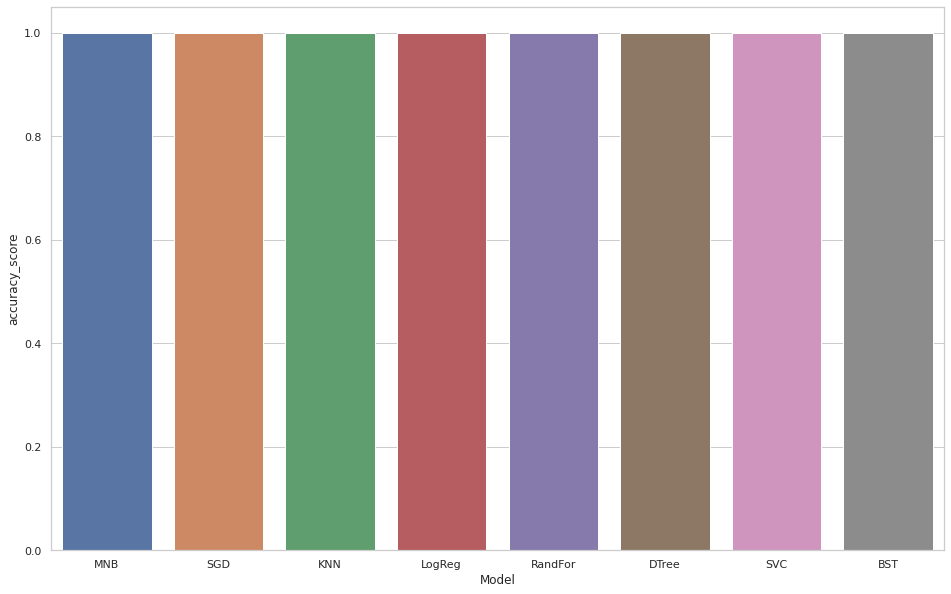

In [ ]:
plt.figure(figsize = (16,10)) #plot the accuracy scores
sns.barplot(x=df['Model'], y=df['accuracy_score'], data=df)
plt.show()

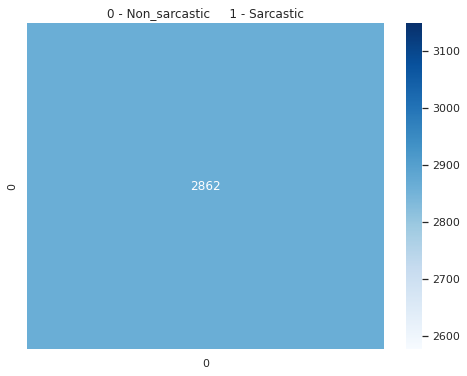

In [ ]:
# Using counfusion matrix for best model(MultinomialNB )
from sklearn.metrics import confusion_matrix,classification_report
conf_mtx=confusion_matrix(y_pred1,y_test)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mtx,annot=True,fmt='d',cmap='Blues')
plt.title("1 - Non_sarcastic     0 - Sarcastic")
plt.show()